In [3]:
import radiant as rad
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['axes.labelsize'] = 'x-large'
plt.rcParams['axes.titlesize'] = 'x-large'
plt.rcParams['xtick.labelsize'] = 'large'
plt.rcParams['ytick.labelsize'] = 'large'

# Problem Parameters
a = 0.
b = 1.


def exact(*x):
    return np.prod(np.cos(np.asarray(x) * 2 * np.pi / (b - a)), axis=0)


def f(*x):
    return (len(x) * (2 * np.pi / (b - a)) ** 2) * exact(*x)

In [4]:
# Parameters
d = 2
k = 2
delta = 0.5
Ns = np.arange(4, 15, 1, dtype=int)

# Computed Parameters
ranges = ((a, b),) * d

# Integration
integrator = rad.integrate.MeanIntegrator(ranges, 250)
error_integrator = rad.integrate.QuadIntegrator(ranges)

# Data collection
results = np.zeros((np.size(Ns), 3))

for i, N in enumerate(Ns):
    xc = rad.gridn(ranges, N, flat=True)

    # Solve for approximate solution
    phi = rad.Wendland(d, k, delta, xc)
    solver = rad.solve.GalerkinSolver(phi, integrator, "helmholtz")
    approx = solver.solve(f)
    error = rad.error(exact, approx, error_integrator)
    cond = solver.cond()
    bw = np.max(solver.bandwidth())
    
    results[i,0] = error 
    results[i, 1] = cond
    results[i, 2] = bw
    
    print("N:", N ** d)
    print("  L2 Error:", error)
    print("  Condition Number:", cond)
    print("  Bandwidth:", bw)

N: 16
  L2 Error: 0.29953040122024377
  Condition Number: 13.963871592802466
  Bandwidth: 10
N: 25
  L2 Error: 0.07508969954411959
  Condition Number: 86.4627684847848
  Bandwidth: 17
N: 36
  L2 Error: 0.012788682566838894
  Condition Number: 101.22806851523342
  Bandwidth: 26
N: 49
  L2 Error: 0.01281173863432584
  Condition Number: 138.61175478650154
  Bandwidth: 38
N: 64
  L2 Error: 0.013087338019525187
  Condition Number: 833.9975734933948
  Bandwidth: 51
N: 81
  L2 Error: 0.011345156762668767
  Condition Number: 3476.663742145073
  Bandwidth: 66
N: 100
  L2 Error: 0.01124692989854438
  Condition Number: 16176.505507928008
  Bandwidth: 84
N: 121
  L2 Error: 0.011132721227617095
  Condition Number: 55797.79225824883
  Bandwidth: 103
N: 144
  L2 Error: 0.01117446349485073
  Condition Number: 158439.26827303073
  Bandwidth: 124
N: 169
  L2 Error: 0.011218480038670637
  Condition Number: 504989.75953834585
  Bandwidth: 147
N: 196
  L2 Error: 0.011272203862174146
  Condition Number: 126

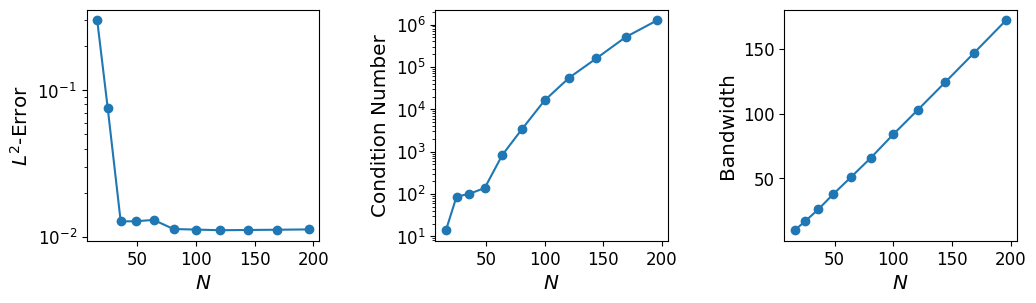

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(12,3))

axs[0].set_xlabel(r"$N$")
axs[0].set_ylabel(r"$L^{2}$-Error")
axs[0].set_yscale('log')
axs[0].plot(Ns ** d, results[:, 0], 'o-')

axs[1].set_xlabel(r"$N$")
axs[1].set_ylabel(r"Condition Number")
axs[1].set_yscale('log')
axs[1].plot(Ns ** d, results[:, 1], 'o-')

axs[2].set_xlabel(r"$N$")
axs[2].set_ylabel(r"Bandwidth")
axs[2].plot(Ns ** d, results[:, 2], 'o-')

plt.subplots_adjust(wspace=0.5)
plt.savefig("figures/galerkin/ns.pdf", bbox_inches='tight')